# Image Enhancement Techniques

### Step1: Import packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
!pipreqs --print

matplotlib==3.5.3
numpy==1.23.2
opencv_python==4.6.0.66
pandas==1.4.3
regex==2022.8.17


INFO: Successfully output requirements


### Step2: Read a non-prosity and a porosity image and combine them into a single image

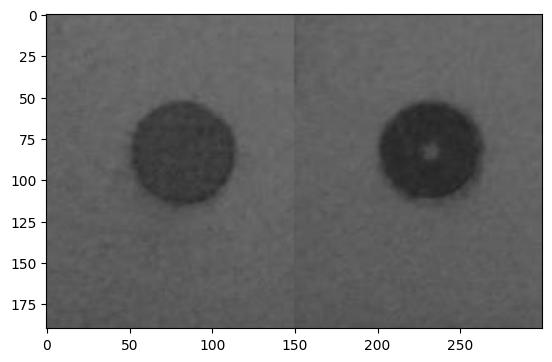

In [3]:
img_No_pros= cv2.imread('D:/UoH_PhD_Exp/Data/Crop_images/B1/0_B1_Layer_244.jpg')
img_Pros=cv2.imread('D:/UoH_PhD_Exp/Data/Crop_images/B1/1_B1_Layer_327.jpg')
images=np.concatenate((img_No_pros,img_Pros),axis=1)
plt.imshow(images)
plt.show()

### Step 3: Convert the images into a grayscale image

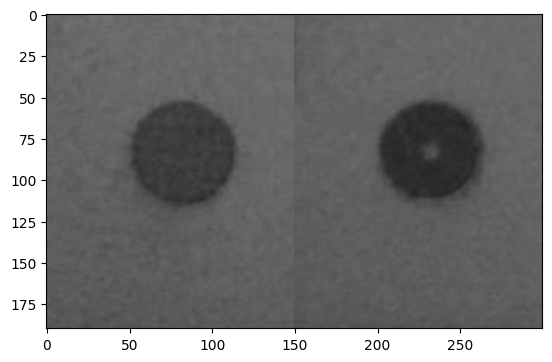

In [4]:
gray_img_no_pore=cv2.cvtColor(img_No_pros,cv2.COLOR_BGR2GRAY)
gray_img_pore=cv2.cvtColor(img_Pros,cv2.COLOR_BGR2GRAY)
gray_images=np.concatenate((gray_img_no_pore,gray_img_pore),axis=1)
plt.imshow(gray_images,  cmap='gray', vmin=0, vmax=255)
plt.show()

### Step 4: Now we find out the histograms of the grayscale image and look for the distribution of intensities.

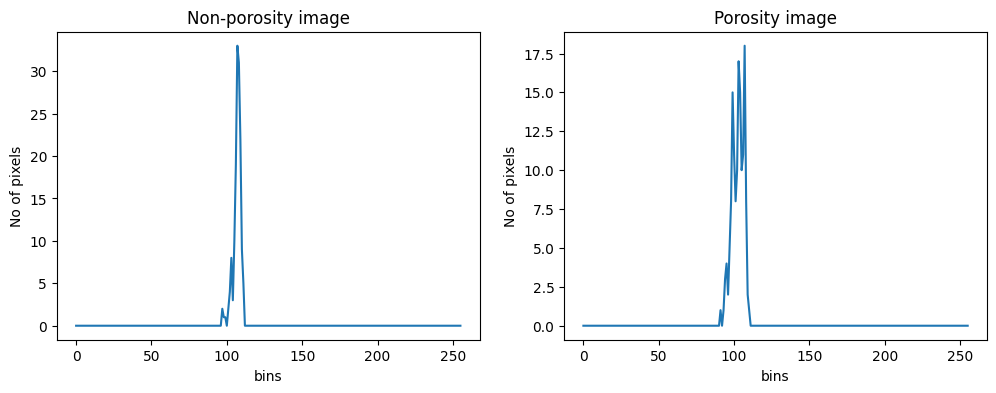

In [5]:
hist_no_pore=cv2.calcHist(gray_img_no_pore,[0],None,[256],[0,256])
hist_pore=cv2.calcHist(gray_img_pore,[0],None,[256],[0,256])

figure(figsize=(12, 4))
plt.subplot(121)
plt.title("Non-porosity image")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist_no_pore)
plt.subplot(122)
plt.title("Porosity image")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist_pore)
plt.show()

### Step 5: Now we will use cv2.equalizeHist() function with the purpose of equalizing the contrast of a given grayscale image. cv2.equalizeHist() function normalises the brightness and also increases the contrast.

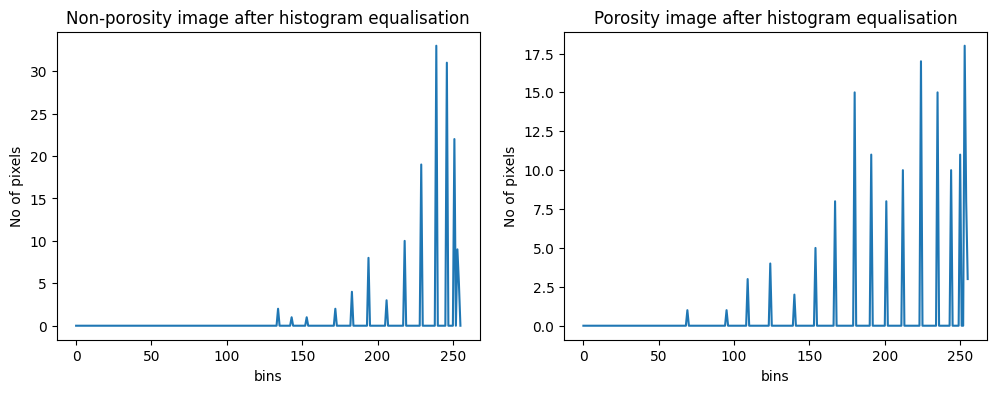

In [6]:
gray_img_no_pore_eqhist=cv2.equalizeHist(gray_img_no_pore)
gray_img_pore_eqhist=cv2.equalizeHist(gray_img_pore)
hist_no_pore=cv2.calcHist(gray_img_no_pore_eqhist,[0],None,[256],[0,256])
hist_pore=cv2.calcHist(gray_img_pore_eqhist,[0],None,[256],[0,256])

figure(figsize=(12, 4))
plt.subplot(121)
plt.title("Non-porosity image after histogram equalisation")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist_no_pore)

plt.subplot(122)
plt.title("Porosity image after histogram equalisation")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist_pore)

plt.show()

### Step 6: Display the Gray Scale Histogram equalized images

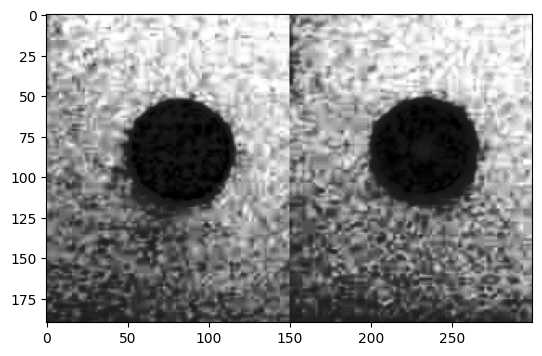

In [7]:
eqhist_images=np.concatenate((gray_img_no_pore_eqhist,gray_img_pore_eqhist),axis=1)


figure(figsize=(12, 4))
plt.imshow(eqhist_images,  cmap='gray', vmin=0, vmax=255)
plt.show()

### Step 7 : Contrast Limited Adaptive Histogram Equalization
>This algorithm can be applied to improve the contrast of the images. This algorithm works by creating several histograms of the image and uses all of these histograms to redistribute the lightness of the image.CLAHE can be applied to greyscale as well as colour images. There are 2 parameters to tune.

> 1. Clip limit which sets the threshold for contrast limiting. The default value is 40
>2. tileGridsize which sets the number of titles in the row and column. While applying CLAHE image is divided into small blocks called tiles (8*8) in order to perform calculations.

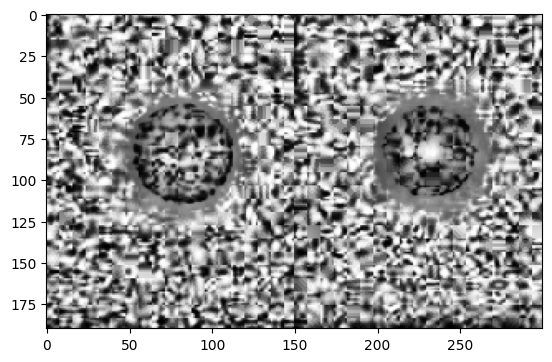

In [8]:
clahe=cv2.createCLAHE(clipLimit=150)
gray_img_clahe=clahe.apply(gray_img_no_pore_eqhist)
gray_img1_clahe=clahe.apply(gray_img_pore_eqhist)
images=np.concatenate((gray_img_clahe,gray_img1_clahe),axis=1)
plt.imshow(images, cmap='gray', vmin=0, vmax=255)
plt.show()

### Step 8: Thresholding Techniques
> Thresholding is a simple, yet effective method for image partitioning into a foreground and background. The simplest thresholding methods replace each pixel in the source image with a black pixel if the pixel intensity is less than some predefined constant(the threshold value)or a white pixel if the pixel intensity is greater than the threshold value. Different types of Thresholding are:-

>cv2.THRESH_BINARY

>cv2.THRESH_BINARY_INV

>cv2.THRESH_TRUNC

>cv2.THRESH_TOZERO

>cv2.THRESH_TOZERO_INV

>cv2.THRESH_OTSU

>cv2.THRESH_TRIANGLE

>Try changing the threshold and max_val to obtain different results.

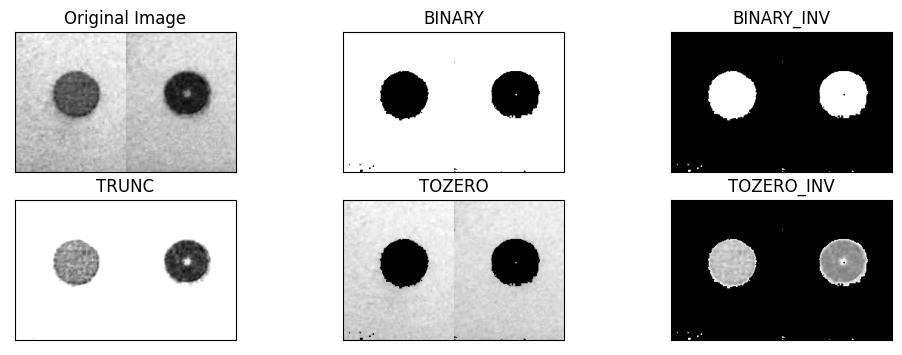

In [9]:
threshold_val = 80
img = gray_images
ret,thresh1 = cv2.threshold(img,threshold_val,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,threshold_val,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,threshold_val,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,threshold_val,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,threshold_val,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

figure(figsize=(12,4))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Step 9: Adaptive Thresholding
>In the previous section, we have applied cv2.threshold() using a global threshold value. As we could see, the obtained results were not very good due to the different illumination conditions in the different areas of the image. In these cases, you can try adaptive thresholding. In OpenCV, the adaptive thresholding is performed by the cv2.adapativeThreshold() function

>This function applies an adaptive threshold to the src array (8­bit single­channel image). The maxValue parameter sets the value for the pixels in the dst image for which the condition is satisfied. The adaptiveMethod parameter sets the adaptive thresholding algorithm to use .

>cv2.ADAPTIVE_THRESH_MEAN_C: The T(x, y) threshold value is calculated as the mean of the blockSize x blockSize neighbourhood of (x, y) minus the C parameter.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C: The T(x, y) threshold value is calculated as the weighted sum of the blockSize x blockSize neighbourhood of (x, y) minus the C parameter.

>The blockSize parameter sets the size of the neighbourhood area used to calculate a threshold value for the pixel, and it can take the values 3, 5, 7,… and so forth.

>The C parameter is just a constant subtracted from the means or weighted means (depending on the adaptive method set by the adaptiveMethod parameter). Commonly, this value is positive, but it can be zero or negative.

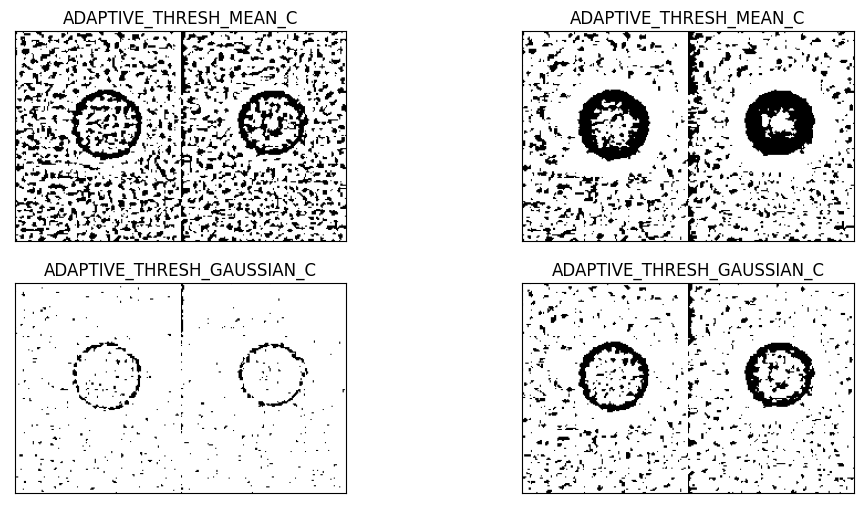

In [10]:

gray_image = gray_images #cv2.imread('gray.png',0) #read as grayscale image
thresh1 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
thresh4 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 4)


titles = ['ADAPTIVE_THRESH_MEAN_C','ADAPTIVE_THRESH_MEAN_C','ADAPTIVE_THRESH_GAUSSIAN_C','ADAPTIVE_THRESH_GAUSSIAN_C']
images = [ thresh1, thresh2, thresh3, thresh4]

figure(figsize=(12,6))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Step 10: OTSU Binarization

>Otsu’s binarization algorithm, which is a good approach when dealing with bimodal images. A bimodal image can be characterized by its histogram containing two peaks. Otsu’s algorithm automatically calculates the optimal threshold value that separates both peaks by maximizing the variance between two classes of pixels. Equivalently, the optimal threshold value minimizes the intra­class variance. Otsu’s binarization algorithm is a statistical method, because it relies on statistical information derived from the histogram (for example, mean, variance, or entropy)

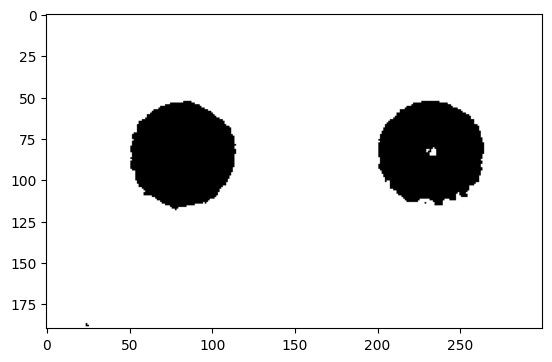

In [11]:

#gray_images
ret,thresh2 = cv2.threshold(gray_images,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)


plt.imshow(thresh2,'gray')
plt.show()
#cv2.imwrite('rect.jpeg',np.concatenate((thresh1,thresh2),axis=1))

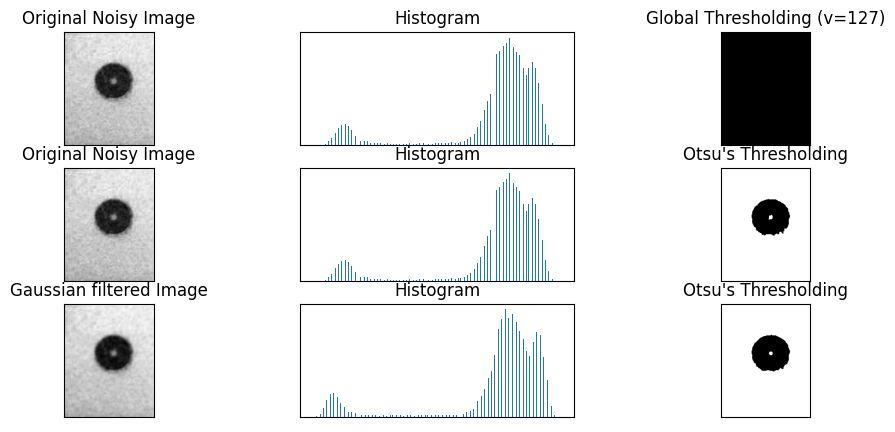

In [12]:
img = cv2.imread('D:/UoH_PhD_Exp/Data/Crop_images/B1/1_B1_Layer_327.jpg', 0)
#img = cv2.imread('D:/UoH_PhD_Exp/Data/Crop_images/B1/0_B1_Layer_244.jpg', 0)


# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

figure(figsize=(12,5))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## Summary!

> In this notebook, we have learnt and explores histogram analysis of a grey-scaleimage, various histogram equalisation methods and image thresholding methods. 
>Non Adaptive thresholding methods required user input pre-defined threshold value between 0 and 255. Whereas, adaptive thresholidng methods find the optimal thresholding value from the image.
> Otsu binarisation thresholding method is themost suited for our porosity dataset as it binnarised the images without losing the crucial porosity information.

Source: https://towardsdatascience.com/image-enhancement-techniques-using-opencv-and-python-9191d5c30d45